In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib
import q_learning
importlib.reload(q_learning)
from q_learning import run
import numpy as np

### Creation of Q_learning tables

In [141]:
from itertools import product
is_training = [True]
is_slippery = [False, True]
n_episodes = [15000]
map_names = ['4x4']
seed = [10]
learning_rate_as = [0.1, 0.5, 0.9]
discount_factor_gammas = [0.1, 0.5, 0.9]
epsilon = [1]
epsilon_decay_rates = [0.0001]
render = [False]
hyperparameter_grid = list(product(is_training, render, is_slippery, n_episodes, map_names, seed, learning_rate_as, discount_factor_gammas, epsilon, epsilon_decay_rates))

In [142]:
results = []
num_hyper = len(hyperparameter_grid)
print(f"Running {num_hyper} hyperparameter combinations")

for hyperparameters in hyperparameter_grid:
    is_training, render, is_slippery, n_episodes, map_name, seed, learning_rate_a, discount_factor_gamma, epsilon, epsilon_decay_rate = hyperparameters
    rewards_per_episode = run(is_training=is_training, render=render, is_slippery=is_slippery, episodes=n_episodes, map_name=map_name, seed=seed, learning_rate_a=learning_rate_a, discount_factor_g=discount_factor_gamma, epsilon=epsilon, epsilon_decay_rate=epsilon_decay_rate)
    results.append({"is_training": is_training, "render": render, "is_slippery": is_slippery, "n_episodes": n_episodes, "map_name": map_name, "seed": seed, "learning_rate_a": learning_rate_a, "discount_factor_gamma": discount_factor_gamma, "epsilon": epsilon, "epsilon_decay_rate": epsilon_decay_rate, "rewards_per_episode": rewards_per_episode})
    print(f"{len(results)/num_hyper*100}% done")
    
df = pd.DataFrame(results)

Running 18 hyperparameter combinations
5.555555555555555% done
11.11111111111111% done
16.666666666666664% done
22.22222222222222% done
27.77777777777778% done
33.33333333333333% done
38.88888888888889% done
44.44444444444444% done
50.0% done
55.55555555555556% done
61.111111111111114% done
66.66666666666666% done
72.22222222222221% done
77.77777777777779% done
83.33333333333334% done
88.88888888888889% done
94.44444444444444% done
100.0% done


In [143]:
def calc_sum_rewards(rewards_per_episode):
    sum_rewards = np.zeros(rewards_per_episode.shape[0])
    for t in range(rewards_per_episode.shape[0]):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
        
    return sum_rewards

In [144]:
df['sum_rewards'] = df['rewards_per_episode'].apply(calc_sum_rewards)
display(df.head())


,is_training,render,is_slippery,n_episodes,map_name,seed,learning_rate_a,discount_factor_gamma,epsilon,epsilon_decay_rate,rewards_per_episode,sum_rewards
0,True,False,False,15000,4x4,10,0.1,0.1,1,0.0001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,True,False,False,15000,4x4,10,0.1,0.5,1,0.0001,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,True,False,False,15000,4x4,10,0.1,0.9,1,0.0001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,True,False,False,15000,4x4,10,0.5,0.1,1,0.0001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ..."
4,True,False,False,15000,4x4,10,0.5,0.5,1,0.0001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


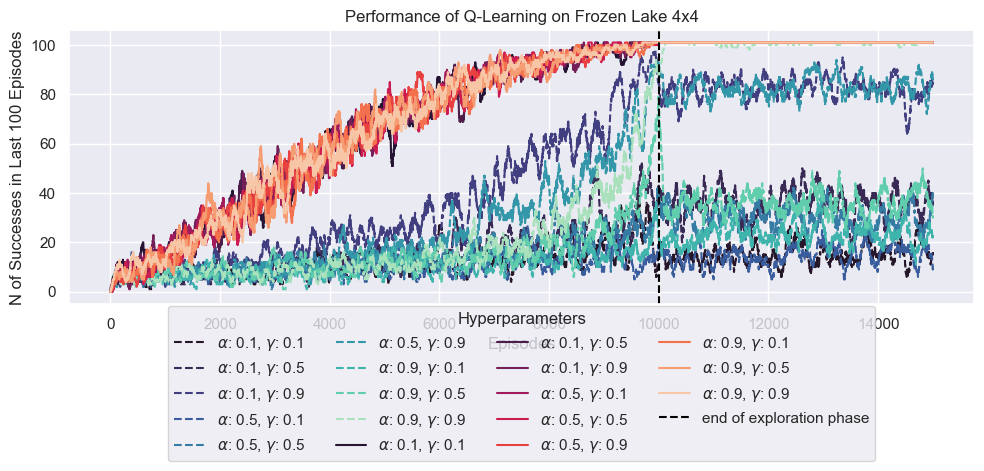

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_results(df, map_name):
    df = df[df['map_name'] == map_name]
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    
    df_slippery = df[df['is_slippery'] == True]
    colors = sns.color_palette("mako", len(df_slippery)).as_hex()
    i = 0
    for index, row in df_slippery.iterrows():
        alpha = row['learning_rate_a']
        gamma = row['discount_factor_gamma']
        label = f"$\\alpha$: {alpha}, $\\gamma$: {gamma}"
        sns.lineplot(x=np.arange(len(row['sum_rewards'])), y=row['sum_rewards'], label=label, linestyle="dashed", color=colors[i])
        i += 1
        
        
    df_solid = df[df['is_slippery'] == False]
    colors = sns.color_palette("rocket", len(df_solid)).as_hex()
    i = 0
    for index, row in df_solid.iterrows():
        alpha = row['learning_rate_a']
        gamma = row['discount_factor_gamma']
        label = f"$\\alpha$: {alpha}, $\\gamma$: {gamma}"
        sns.lineplot(x=np.arange(len(row['sum_rewards'])), y=row['sum_rewards'], label=label, linestyle="solid", color=colors[i])
        i += 1
        
    #plot a vertical line at 100 episodes
    plt.axvline(x=10000, color='black', linestyle='--', label="end of exploration phase")
    plt.xlabel('Episodes')
    plt.ylabel('N of Successes in Last 100 Episodes')
    plt.title(f'Performance of Q-Learning on Frozen Lake {map_name}')
    plt.legend(title='Hyperparameters', loc='lower center', bbox_to_anchor=(0.5, -0.6), ncol=len(df_solid)//2)  # Adjust the bbox_to_anchor for positioning
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.savefig(f'./plots/frozen_lake_rewards_{map_name}.png')  # Save the plot with map_name in the file name
    plt.show()

# Assuming 'df' is your DataFrame containing the data
plot_results(df, '4x4')
